# Artificial Neural Network

### Importing the libraries

In [1]:
!pip install matplotlib

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy.random as nr
import math
from scipy import stats
import scipy.stats as st
from sklearn import datasets
from sklearn.metrics import mean_squared_error as MSE
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
...
# Import library to hide warnings
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%config Completer.use_jedi = False

In [2]:
# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

In [3]:

import tensorflow as tf

In [4]:
tf.__version__

'2.5.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [5]:
dataset = pd.read_csv("Life Expectancy Data.csv")

In [6]:
dataset

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [7]:
#data clean
##Removing Trailing Spaces in Column Names Some column names in the dataset contains trailing space. 
def rename_col_names(x):
    out={}
    for i in x:
        out[i] = i.rstrip()
    return out
col_names = list(dataset.columns)
dataset.rename(columns=rename_col_names(col_names), inplace=True)
col_names = list(dataset.columns)
col_names

['Country',
 'Year',
 'Status',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 ' BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [8]:
#Fill missing values grouped by countries.
columns_with_null = list(dataset.columns[dataset.isna().any()])
dataset[columns_with_null] = dataset.groupby('Country')[columns_with_null].transform(lambda x:x.fillna(x.mean()))
dataset

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [9]:
##Even now some data are NaN. This is because for some countries these columns were not measured. So just drop them
dataset.dropna(inplace=True)

In [10]:
dataset = dataset.drop('Country',axis=1)

dataset.rename(columns = {'Life expectancy ' : 'Life_expectancy','Adult Mortality':'Adult_Mortality', 'infant deaths' : 'Infant_death', 'Alcohol percentage':'Alcohol',  'percentage expenditure':'expenditure','Hepatitis B': 'Hepatitis','Total expenditure ':'Texpense','Diphtheria':'diphteria','HIV/AIDS':'HIV','thinness  1-19 years':'general_thinness','thinness 5-9 years':'childhood_thinness','Income composition of resources':'income'}, inplace = True)
df=dataset.copy()
#population, GDP,Measles, expenditure  have large outliers which have to be removed
# Calculate the 25th and 75th quartiles of the population
Q1_population, Q1_GDP = df['Population'].quantile(0.25), df['GDP'].quantile(0.25)
Q3_population, Q3_GDP= df['Population'].quantile(0.75), df['GDP'].quantile(0.75)

# Determine the Interquartile range to filter out records outside of ~3 standard deviations
IQR_population, IQR_GDP = Q3_population - Q1_population, Q3_GDP - Q1_GDP

# Remove records where the data are not within ~3 standard deviations
# IQR method removes more outliers than Z-score since it looks at about 2.7 instead of 3 standard deviations
df = df[(df['Population'] >= Q1_population - (2 * IQR_population)) & (df['GDP'] >= Q1_GDP - (2 * IQR_GDP))]
df = df[(df['Population'] <= Q3_population + (2 * IQR_population)) & (df['GDP'] <= Q1_GDP + (2 * IQR_GDP))]

#population, GDP,Measles, expenditure  have large outliers which have to be removed
# Calculate the 25th and 75th quartiles of the population
Q1_expenditure = df['expenditure'].quantile(0.25)
Q3_expenditure = df['expenditure'].quantile(0.75)

# Determine the Interquartile range to filter out records outside of ~3 standard deviations
IQR_expenditure = Q3_expenditure - Q1_expenditure

# Remove records where the data are not within ~3 standard deviations
# IQR method removes more outliers than Z-score since it looks at about 2.7 instead of 3 standard deviations
df = df[(df['expenditure'] >= Q1_expenditure - (2 * IQR_expenditure))]
df = df[(df['expenditure'] <= Q3_expenditure + (2 * IQR_expenditure))]


In [11]:
df["Status"].replace({"Developing": "1", "Developed": "0"}, inplace=True)
df = df.astype({"Status": str, "Status": int})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1546 entries, 1 to 2937
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   1546 non-null   int64  
 1   Status                 1546 non-null   int32  
 2   Life expectancy        1546 non-null   float64
 3   Adult_Mortality        1546 non-null   float64
 4   Infant_death           1546 non-null   int64  
 5   Alcohol                1546 non-null   float64
 6   expenditure            1546 non-null   float64
 7   Hepatitis              1546 non-null   float64
 8   Measles                1546 non-null   float64
 9    BMI                   1546 non-null   float64
 10  under-five deaths      1546 non-null   int64  
 11  Polio                  1546 non-null   float64
 12  Total expenditure      1546 non-null   float64
 13  diphteria              1546 non-null   float64
 14   HIV/AIDS              1546 non-null   float64
 15  GDP 

In [13]:
#Adult mortality,alcohol consumption, ,BMI
##Diphtheria, HIV , Income index  and schooling
#Were significant


In [14]:

X = df.iloc[:,[3,5,9,13,14,19,20]].values
y = df.iloc[:,[2]].values

In [17]:
### number of hideen layers
#Nh = Ns/(α∗ (Ni + No))


Epoch 1/90
31/31 [==============================] - 2s 2ms/step - loss: 1.1754 - MSE: 1.1754
Epoch 2/90
31/31 [==============================] - 0s 2ms/step - loss: 0.9793 - MSE: 0.9793
Epoch 3/90
31/31 [==============================] - 0s 2ms/step - loss: 0.8573 - MSE: 0.8573
Epoch 4/90
31/31 [==============================] - 0s 2ms/step - loss: 0.7706 - MSE: 0.7706
Epoch 5/90
31/31 [==============================] - 0s 2ms/step - loss: 0.7049 - MSE: 0.7049
Epoch 6/90
31/31 [==============================] - 0s 2ms/step - loss: 0.6532 - MSE: 0.6532
Epoch 7/90
31/31 [==============================] - 0s 2ms/step - loss: 0.6085 - MSE: 0.6085
Epoch 8/90
31/31 [==============================] - 0s 2ms/step - loss: 0.5722 - MSE: 0.5722
Epoch 9/90
31/31 [==============================] - 0s 2ms/step - loss: 0.5405 - MSE: 0.5405
Epoch 10/90
31/31 [==============================] - 0s 2ms/step - loss: 0.5122 - MSE: 0.5122
Epoch 11/90
31/31 [==============================] - 0s 2ms/step - lo

Text(0.5, 1.0, 'Prediction')

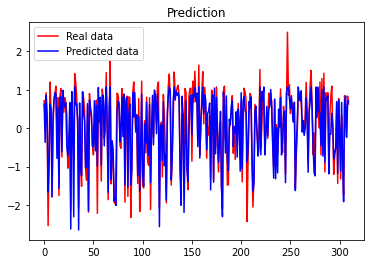

In [15]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(3, activation = 'relu', input_dim = 7))

# Adding the second hidden layer
model.add(Dense(units = 3, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units =3, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 1))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['MSE'])

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 40, epochs = 90)

y_pred = model.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [16]:
rmse = np.sqrt(MSE(sc.inverse_transform(y_test),sc.inverse_transform(model.predict(X_test))))
rmse

3.7134471634091493

In [19]:
from sklearn.metrics import r2_score
print(r2_score(sc.inverse_transform(y_test),sc.inverse_transform(model.predict(X_test))))

0.8327165374573413


In [18]:
# Separate Target Variable and Predictor Variables

#TargetVariable=['Life expectancy']
#Predictors=['Adult_Mortality', 'Infant_death', ' BMI', 'under-five deaths', 'diphteria', ' thinness 5-9 years','income','Schooling']

#X=df[Predictors].values
#y=df[TargetVariable].values

### Sandardization of data ###
#from sklearn.preprocessing import StandardScaler
#PredictorScaler=StandardScaler()
#TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
#PredictorScalerFit=PredictorScaler.fit(X)
#TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
#X=PredictorScalerFit.transform(X)
#y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)

In [17]:
# importing the libraries
#from keras.models import Sequential
#from keras.layers import Dense

# create ANN model
#model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
#model.add(Dense(units=5, input_dim=8, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
#model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
#No activation function is used for the output layer because it is a regression problem and we are interested in predicting numerical values directly without transform.
#model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
#model.compile(optimizer='adam',loss='mean_squared_error', metrics=['accuracy'])

# Fitting the ANN to the Training set
#model.fit(X_train, y_train ,batch_size = 30, epochs = 60, verbose=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[10, 60]
    epoch_list  =   [20,100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=3, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

             #Defining the Second layer of the model
            model.add(Dense(units=3, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.absolute(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 10 - epochs: 20 Accuracy: -4.035464466944234
2 Parameters: batch_size: 10 - epochs: 100 Accuracy: 9.310413829362858
3 Parameters: batch_size: 60 - epochs: 20 Accuracy: 38.30190552353572
4 Parameters: batch_size: 60 - epochs: 100 Accuracy: -10.208096389766766


In [20]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Life expectancy']=y_test_orig
TestingData['PredictedLife expectancy']=Predictions
TestingData.head()

,Adult_Mortality,Infant_death,BMI,under-five deaths,diphteria,thinness 5-9 years,income,Schooling,Life expectancy,PredictedLife expectancy
0,185.0,28.0,35.3,34.0,99.0,3.3,0.594,10.7,67.4,70.423325
1,128.0,1.0,5.5,1.0,92.0,2.8,0.735,13.1,73.9,75.303047
2,498.0,55.0,43.6,84.0,79.0,13.9,0.609,12.9,53.8,49.499191
3,291.0,2.0,31.9,3.0,81.0,6.8,0.645,12.4,61.6,66.929794
4,147.0,3.0,49.4,3.0,87.0,1.9,0.688,12.3,73.9,74.564247


In [21]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Life expectancy']-TestingData['PredictedLife expectancy'])/TestingData['Life expectancy'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 96.01094821182258


,Adult_Mortality,Infant_death,BMI,under-five deaths,diphteria,thinness 5-9 years,income,Schooling,Life expectancy,PredictedLife expectancy,APE
0,185.0,28.0,35.3,34.0,99.0,3.3,0.594,10.7,67.4,70.423325,4.485645
1,128.0,1.0,5.5,1.0,92.0,2.8,0.735,13.1,73.9,75.303047,1.898575
2,498.0,55.0,43.6,84.0,79.0,13.9,0.609,12.9,53.8,49.499191,7.994068
3,291.0,2.0,31.9,3.0,81.0,6.8,0.645,12.4,61.6,66.929794,8.652263
4,147.0,3.0,49.4,3.0,87.0,1.9,0.688,12.3,73.9,74.564247,0.898846


Finding the best parameters using gridsearch cv

In [17]:
# Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=3, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

###########################################
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# Listing all the parameters to try
Parameter_Trials={'batch_size':[20,40],
                      'epochs':[10,90],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }

# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)

###########################################
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#########################################
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel, 
                         param_grid=Parameter_Trials, 
                         scoring=custom_Scoring, 
                         cv=5)

#########################################
# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

print('### Printing Best parameters ###')
grid_search.best_params_

Epoch 1/10
62/62 [==============================] - 1s 2ms/step - loss: 4395.3936
Epoch 2/10
62/62 [==============================] - 0s 2ms/step - loss: 3873.8264
Epoch 3/10
62/62 [==============================] - 0s 2ms/step - loss: 2163.4968
Epoch 4/10
62/62 [==============================] - 0s 2ms/step - loss: 865.4896
Epoch 5/10
62/62 [==============================] - 0s 2ms/step - loss: 652.5680
Epoch 6/10
62/62 [==============================] - 0s 2ms/step - loss: 534.7913
Epoch 7/10
62/62 [==============================] - 0s 2ms/step - loss: 430.5308
Epoch 8/10
62/62 [==============================] - 0s 2ms/step - loss: 346.8244
Epoch 9/10
62/62 [==============================] - 0s 2ms/step - loss: 284.4780
Epoch 10/10
62/62 [==============================] - 0s 2ms/step - loss: 242.1383
###################################################################### Accuracy: 78.97854285585922
Epoch 1/10
62/62 [==============================] - 1s 2ms/step - loss: 4414.0200
Epoch

GridSearchCV(cv=5,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001BD7A1CFE80>,
             param_grid={'Optimizer_trial': ['adam', 'rmsprop'],
                         'batch_size': [20, 40], 'epochs': [10, 90]},
             scoring=make_scorer(Accuracy_Score))

########## Total Time Taken:  5 Minutes
### Printing Best parameters ###


{'Optimizer_trial': 'adam', 'batch_size': 40, 'epochs': 90}

0.865

0.3

K-Means Clustering to see if it predicts status

In [ ]:
X = df.iloc[:,[2,3,4,5,9,10,17,18,19,20]].values 
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)# k-means++  is the best math method to skip the clustering trap
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ will calculate (get) the WCSS
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show();

In [ ]:
#######
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans
y = df.iloc[:,[1]].values 

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
ac curacy_score(y, y_kmeans)

# Recall
from sklearn.metrics import recall_score
recall_score(y,y_kmeans)

# Precision
from sklearn.metrics import precision_score
precision_score(y, y_kmeans)
# F1 Score
from sklearn.metrics import f1_score
f1_score(y, y_kmeans)